# Twitter Modeling

___

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span></li></ul></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Random-Forest-Modeling" data-toc-modified-id="Random-Forest-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Modeling</a></span><ul class="toc-item"><li><span><a href="#Instantiate-Random-Forest-Classifier" data-toc-modified-id="Instantiate-Random-Forest-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Instantiate Random Forest Classifier</a></span></li><li><span><a href="#Fit-Classifier-To-Training-Data" data-toc-modified-id="Fit-Classifier-To-Training-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit Classifier To Training Data</a></span></li><li><span><a href="#Performance-Of-Random-Forest-Model" data-toc-modified-id="Performance-Of-Random-Forest-Model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Performance Of Random Forest Model</a></span></li></ul></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cross-Validation</a></span><ul class="toc-item"><li><span><a href="#Instantiate-&amp;-Cross-Validate-Random-Forest-Classifier" data-toc-modified-id="Instantiate-&amp;-Cross-Validate-Random-Forest-Classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Instantiate &amp; Cross Validate Random Forest Classifier</a></span></li><li><span><a href="#Determine-Mean-Cross-Validation-Train-Score" data-toc-modified-id="Determine-Mean-Cross-Validation-Train-Score-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Determine Mean Cross-Validation Train Score</a></span></li></ul></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Predict-Test-Data" data-toc-modified-id="Predict-Test-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predict Test Data</a></span><ul class="toc-item"><li><span><a href="#Baseline-Random-Forest-Model" data-toc-modified-id="Baseline-Random-Forest-Model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Baseline Random Forest Model</a></span></li><li><span><a href="#Hyperparameter-Tuned-Random-Forest-Model" data-toc-modified-id="Hyperparameter-Tuned-Random-Forest-Model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Hyperparameter Tuned Random Forest Model</a></span></li></ul></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Importances</a></span><ul class="toc-item"><li><span><a href="#Generate-DataFrame-Of-Feature-Importances" data-toc-modified-id="Generate-DataFrame-Of-Feature-Importances-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Generate DataFrame Of Feature Importances</a></span></li><li><span><a href="#Plot-Feature-Importances" data-toc-modified-id="Plot-Feature-Importances-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plot Feature Importances</a></span></li></ul></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#ADASYN" data-toc-modified-id="ADASYN-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ADASYN</a></span></li><li><span><a href="#AUC-/-ROC" data-toc-modified-id="AUC-/-ROC-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>AUC / ROC</a></span></li></ul></div>

___

## Setup

### Import Packages

In [383]:
import sys
sys.path.append("..")

In [384]:
# Import necessary python packages and functions
from Py_Files.imports import *
from Py_Files.max_range import *
%matplotlib inline

### Import Data

In [236]:
df = pd.read_csv('../Data/Twitter_Data_Final.csv', index_col=0)

In [240]:
y = df['retweet_class']
X = df.drop('retweet_class', axis=1)

___

## Train/Test Split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state=10)

___

## Scaling

In [242]:
ss = StandardScaler()

In [243]:
X_train_ss = ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

___

## Random Forest Modeling

### Instantiate Random Forest Classifier

In [408]:
base_model = RandomForestClassifier(n_estimators = 100, #number of trees
                             criterion = 'gini', #traditional "Entropy" equation or "Gini"
                             max_features = None, #how many variables (features) in each tree (you can use log2, sqrt, auto, or None (which means "max features"))
                             max_depth = 10,
                             random_state=2020,
                             oob_score= True) #Out Of Bag score (set to True to show this)

### Fit Classifier To Training Data

In [409]:
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=2020,
                       verbose=0, warm_start=False)

### Performance Of Random Forest Model

In [410]:
base_model.oob_score_

0.8381429027792567

In [411]:
base_model.score(X_train, y_train)

0.8925567032264935

## Cross-Validation

### Instantiate & Cross Validate Random Forest Classifier

In [413]:
validator = cross_validate(base_model,
                    X_train,
                    y_train,
                    return_train_score=True,
                    return_estimator=True,
                    cv=5)

### Determine Mean Cross-Validation Train Score

In [414]:
mean_train = np.mean(validator['train_score'])
std_train = np.std(validator['train_score'])
print("Mean cross-validation train score: {} +/- standard deviation of: {}".format(mean_train, std_train))

Mean cross-validation train score: 0.8997977166167214 +/- standard deviation of: 0.0019386197087270577


___

## Hyperparameter Tuning

In [374]:
from pprint import pprint

In [375]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [2, 4, 6, 8, 10],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 4, 6, 8],
 'min_samples_split': [2, 4, 6, 8],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [376]:
#instantiate Random Forest Classifier
clf = RandomForestClassifier()

In [379]:
# Random search of hyperparameters, using 5 fold cross validation, 
# Run 100 combinations, and use all available cores on your computer
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=2020)

In [380]:
# Fit RandomizedSearchCV model to X_train, y_train
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   3.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   2.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   2.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   3.7s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   3.7s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=1000, min_samples_sp

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   57.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [381]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

- RandomSearchCV helped us find a good range for each hyperparameter. 
- Now that we have a tighter range for our ideal hyperparameters, we can more more specific about further combinations of settings to run. 
- So now we use GridSearchCV, which lets us try combinations that we specify, using the best values from RandomizedSearchCV as a starting point.

In [386]:
from sklearn.model_selection import GridSearchCV

In [395]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6], #don't want max_depth to be more than 10...prone to overfitting.
    'max_features': [2, 4, 6],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 4],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, verbose = 2)

In [396]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=4, min_samples_leaf=

[CV]  bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=6, min_samples_leaf=

[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=

[CV]  bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=6, min_samples_leaf=

[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  9.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [397]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [405]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

___

## Predict Test Data

### Baseline Random Forest Model

In [415]:
base_model.score(X_test, y_test)

0.84412265758092

In [436]:
base_predictions = base_model.predict(X_test)

In [418]:
base_conf_matrix = pd.DataFrame(confusion_matrix(y_test, base_predictions), index = ['actual 0', 'actual 1', 'actual 2'], 
             columns = ['predicted 0', 'predicted 1', 'predicted 2'])
base_conf_matrix

,predicted 0,predicted 1,predicted 2
actual 0,1877,22,33
actual 1,151,51,43
actual 2,113,4,54


In [420]:
## accuracy
(conf_matrix['predicted 0'][0] + conf_matrix['predicted 1'][1] + conf_matrix['predicted 2']) / len(predictions)

actual 0    0.835179
actual 1    0.839438
actual 2    0.844123
Name: predicted 2, dtype: float64

### Hyperparameter Tuned Random Forest Model

In [427]:
tuned_model = grid_search.best_estimator_
tuned_model.score(X_test, y_test)

0.8228279386712095

In [428]:
tuned_predictions = tuned_model.predict(X_test)

In [429]:
tuned_conf_matrix = pd.DataFrame(confusion_matrix(y_test, tuned_predictions), index = ['actual 0', 'actual 1', 'actual 2'], 
             columns = ['predicted 0', 'predicted 1', 'predicted 2'])
tuned_conf_matrix

,predicted 0,predicted 1,predicted 2
actual 0,1932,0,0
actual 1,245,0,0
actual 2,171,0,0


___

## Feature Importances

### Generate DataFrame Of Feature Importances

In [249]:
feats = {} # create an empty dictionary to hold {feature_name: feature_importance}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #key/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances

,Features,Gini-Importance
0,deets_text_character_length,0.278415
1,tweets_user_favourites_count,0.236463
2,users_listed_count,0.124635
3,users_description_character_length,0.064278
4,tweets_user_statuses_count,0.050458
5,users_tweet_count,0.047235
6,users_following_count,0.034308
7,tweets_user_friends_count,0.032534
8,users_followers_count,0.030920
9,tweets_user_followers_count,0.030583


### Plot Feature Importances

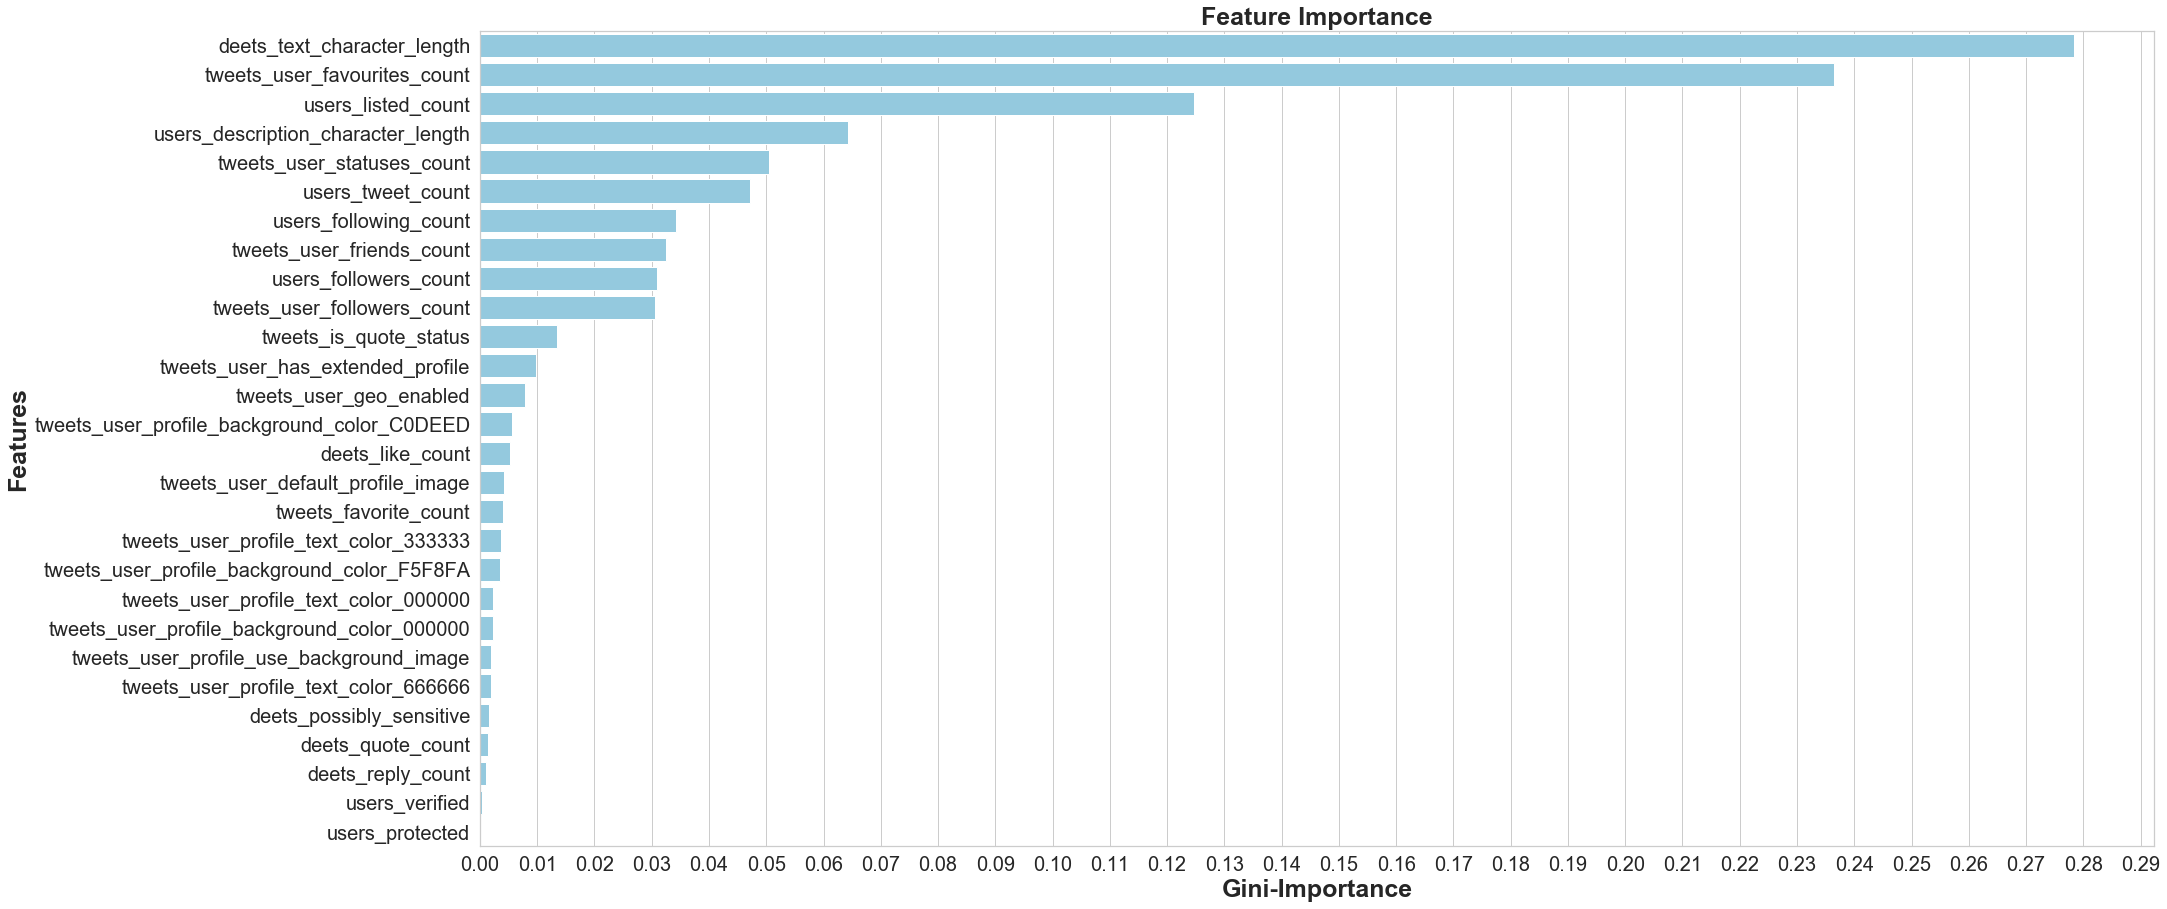

In [260]:
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20, rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.01))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Gini-Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()

___

## SMOTE

In [440]:
from imblearn.over_sampling import SMOTE

In [455]:
smote = SMOTE(k_neighbors=5)

In [443]:
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [444]:
rf_smote = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [445]:
rf_smote.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [446]:
smote_predictions = rf_smote.predict(X_test)

In [447]:
rf_smote.score(X_test,y_test)

0.838160136286201

In [450]:
pd.DataFrame(confusion_matrix(y_test, SMOTE_predictions), columns = ['predicted 0', 'predicted 1', 'predicted 2'], 
             index = ['actual 0', 'actual 1', 'actual 2'])

,predicted 0,predicted 1,predicted 2
actual 0,1825,49,58
actual 1,129,70,46
actual 2,67,31,73


___

## ADASYN

In [459]:
from imblearn.over_sampling import ADASYN

In [460]:
adasyn = ADASYN(sampling_strategy='auto', random_state=2020, n_neighbors=5, n_jobs=-1)

In [461]:
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [462]:
rf_adasyn = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [463]:
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [464]:
adasyn_predictions = rf_adasyn.predict(X_test)

In [474]:
from sklearn.metrics import precision_score

In [479]:
precision_score(y_test, adasyn_predictions, average='weighted')

0.8226138246484116

In [482]:
precision_score(y_test, adasyn_predictions, average=None)

array([0.90034705, 0.49032258, 0.42045455])

In [480]:
from sklearn.metrics import accuracy_score

In [481]:
accuracy_score(y_test, adasyn_predictions)

0.8373083475298126

In [466]:
pd.DataFrame(confusion_matrix(y_test, adasyn_predictions), columns = ['predicted 0', 'predicted 1', 'predicted 2'], 
             index = ['actual 0', 'actual 1', 'actual 2'])

,predicted 0,predicted 1,predicted 2
actual 0,1816,54,62
actual 1,129,76,40
actual 2,72,25,74


___

## AUC / ROC

In [434]:
import scikitplot as skplt

In [437]:
y_true = y_test # ground truth labels
y_probas = base_predictions # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: too many indices for array

In [451]:
fpr, tpr, threshold = roc_curve(y_test, rf_smote.predict_proba(X_test)[:, 1])

ValueError: multiclass format is not supported

NameError: name 'fpr' is not defined

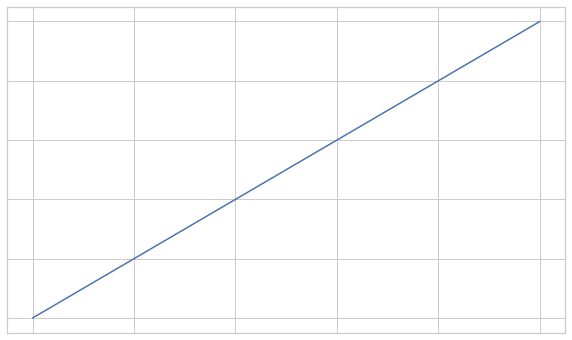

In [452]:
plt.figure(figsize = (10,6))
plt.title('ROC Curve', fontsize = 20)
plt.xlabel('1 - specificity', fontsize = 15)
plt.ylabel('sensitivity', fontsize = 15)
plt.plot([0,1], [0,1])
plt.plot(fpr,tpr);

In [453]:
auc(fpr, tpr)

NameError: name 'fpr' is not defined